# Explore here

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url="https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

total_data = pd.read_csv(url)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
total_data.shape

(48895, 16)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
total_data.drop("host_name", axis = 1).duplicated().sum() #Indica duplicados en las columnas sacando id- host_id....

np.int64(0)

In [5]:
#total_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True) #imprime el dataset sin las columnas eliminadas
#print(total_data.head())
total_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)
print(total_data.head())

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   
3     89               1                270                               1   
4     80              10                  9                               1   

   availability_365  
0               365  
1               35

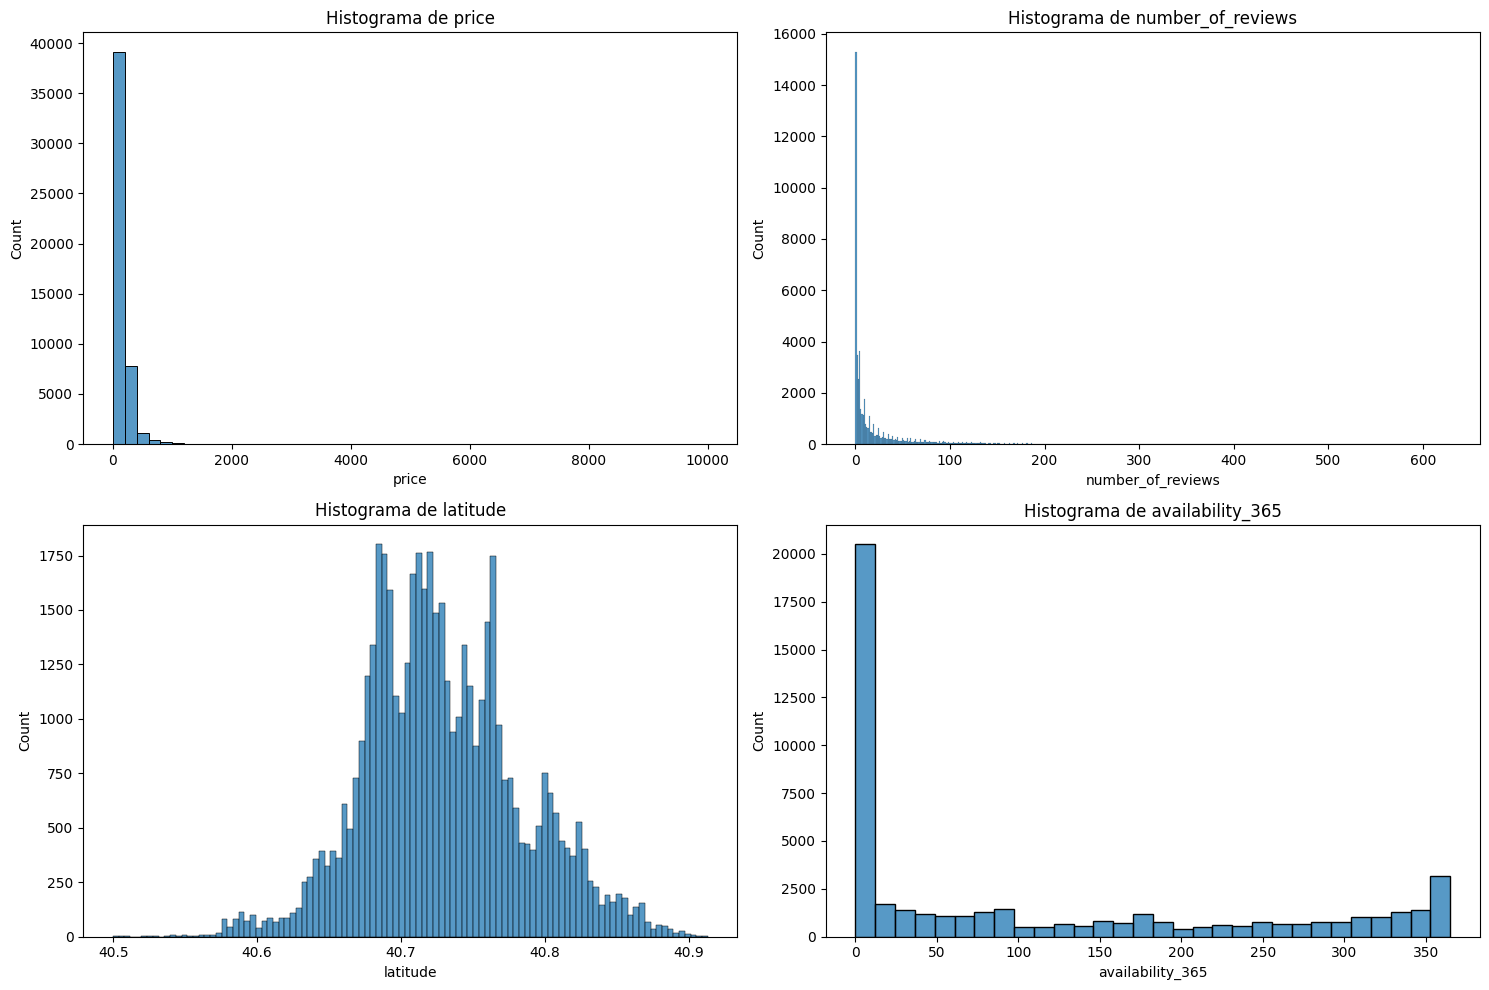

In [6]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de price
sns.histplot(ax=axis[0, 0], data=total_data, x="price", bins=50)
axis[0, 0].set_title('Histograma de price')

# Histograma de number_of_reviews
sns.histplot(ax=axis[0, 1], data=total_data, x="number_of_reviews")
axis[0, 1].set_title('Histograma de number_of_reviews')

# Histograma de availability_365
sns.histplot(ax=axis[1, 1], data=total_data, x="availability_365")
axis[1, 1].set_title('Histograma de availability_365')

# Histograma de latitude
sns.histplot(ax=axis[1, 0], data=total_data, x="latitude")
axis[1, 0].set_title('Histograma de latitude')

plt.tight_layout()
plt.show()

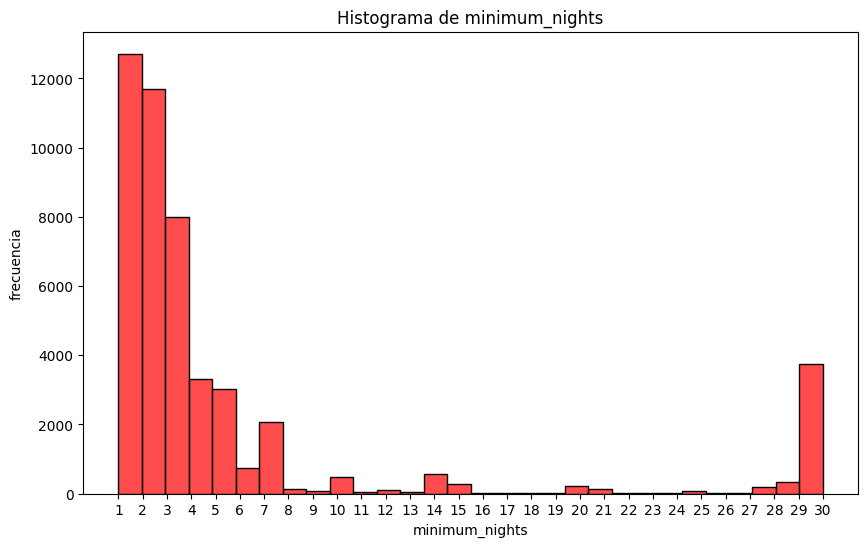

In [7]:
filtered_data =total_data[total_data['minimum_nights'] <= 30] # Filtrar para mostrar solo minimum_nights <= 30

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="minimum_nights", bins=30, color='red', alpha=0.7)
plt.title('Histograma de minimum_nights')
plt.xlabel('minimum_nights')
plt.ylabel('frecuencia')
plt.xticks(range(1, 31))
plt.show()

Analisis de los resultados:

1. price:
El histograma de precios suele mostrar una gran concentración de alojamientos en el rango bajo (la mayoría por debajo de$200), con una larga cola hacia la derecha. Esto indica que la mayoría de los alojamientos son asequibles, pero existen algunos de lujo con precios mucho más altos.

2. number_of_reviews:
La mayoría de los anuncios tienen pocas reseñas, lo que sugiere que muchos listings son nuevos o poco populares. Sin embargo, hay algunos con muchas reseñas, lo que indica que ciertos alojamientos son muy populares o llevan mucho tiempo en la plataforma

3. availability_365:
El histograma de disponibilidad anual muestra que muchos alojamientos estan disponibles todo el año 

4. latitude:
La mayor concentración de estancias suele estar entre 40.7 y 40.8

5. La mayoría de los alojamientos en Airbnb NYC permiten estancias mínimas muy cortas, principalmente de 1, 2 o 3 noches

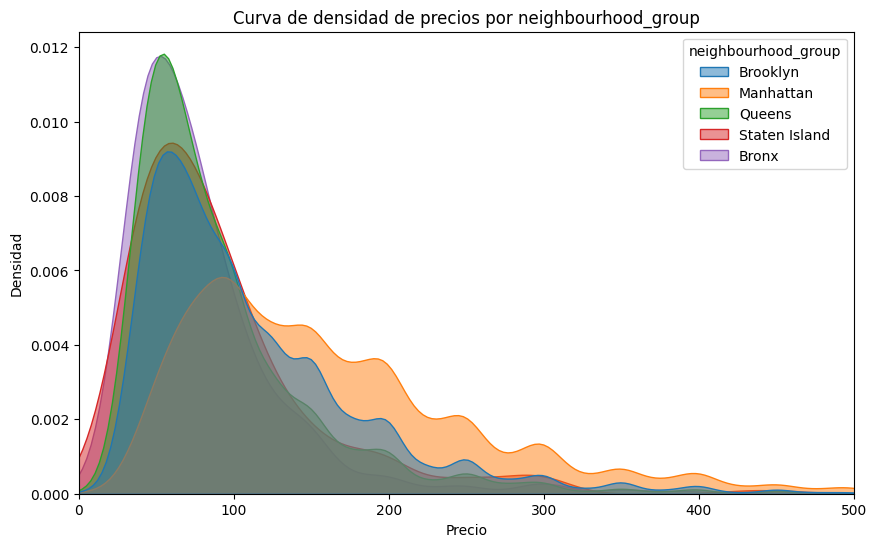

In [8]:
filtered_data = total_data[total_data['price'] < 500]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=filtered_data,
    x='price',
    hue='neighbourhood_group',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('Curva de densidad de precios por neighbourhood_group')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.xlim(0, 500)
plt.show()

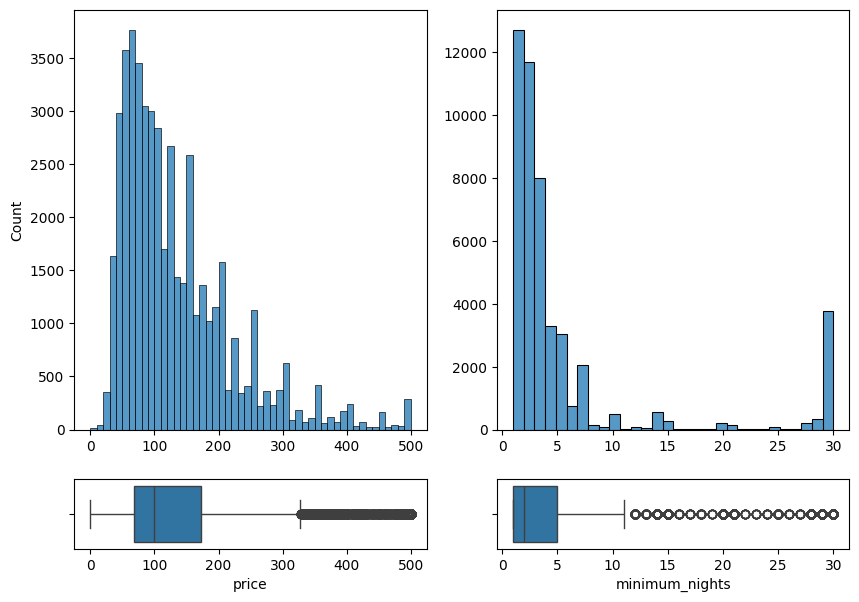

Estadísticas de price:
count    47851.000000
mean       131.530564
std         88.063220
min          0.000000
25%         68.000000
50%        100.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64

Estadísticas de minimum_nights:
count    48148.000000
mean         5.579692
std          8.203838
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64


In [9]:
# muestra los subplot 2x 2 
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

#Filtra los menores a 500 dolares
filtered_data = total_data[total_data['price'] <= 500]

# Creo una figura con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=filtered_data, x="price", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=filtered_data, x="price")

# Filtrando los menores a 30
min_nights_filtered = total_data[total_data['minimum_nights'] <= 30]
sns.histplot(ax=axis[0, 1], data=min_nights_filtered, x="minimum_nights", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=min_nights_filtered, x="minimum_nights")

# Mostrar el plot
plt.show()

print("Estadísticas de price:")
print(filtered_data['price'].describe())
print("\nEstadísticas de minimum_nights:")
print(min_nights_filtered['minimum_nights'].describe())